# Lab 1 Photoelectric effect 

Author: Jonathan Hasan , Jude Riley

Class: Modern Physics 330 

Date: 2/8/2022

Purpose: 

Try to validate the quantum theory of light found by max plank and expanded upon by Einstein!

Strategy: 

Using wavelength data, calculate frequencies and plot stopping voltage versus those frequencies. Determine if the 
quantum theory of light holds up to scrutiny. 



# 1. Import Libraries

In [34]:
#Import necessary libraries 

import numpy as np

import matplotlib.pyplot as plt 

import math 

from scipy import odr

%matplotlib notebook

##  1.1 Helper functions

Use these functions to multiply and divide uncertanties 

In [35]:
def multiply_uncertainties(a, del_a, b, del_b):
    q = a*b
    
    del_q = q * ((del_a/a)+(del_b/b))
    
    return q, del_q 
    

In [36]:
def divide_uncertainties(a, del_a, b, del_b): 
    q = a/b
    
    del_q = q * ((del_a/a)+(del_b/b))
    
    return q, del_q 

# 2. Calculate mean and uncertainties of Voltages

Each of the four colors has 5 data points associated with it. Need to find the mean and the standard deviation of each one. Using one standard deviation means I am 68% confident that my answer lies in this range. 

However, there are some other issues which will be discussed down the line. 

This section will apply mean and standard deviation operations with ddof = 1 for all voltage data including the intensity modified ones. 

In [37]:
#Instantiate voltage arrays for all colors

purple_voltage = np.array([1.56, 1.56, 1.56, 1.56, 1.56])

blue_voltage = np.array([1.90, 1.90, 1.90, 1.90, 1.90])

green_voltage = np.array([.944, .944, .944, .944, .944])

yellow_voltage = np.array([.802, .802, .802, .802, .802])




In [38]:
#Generate mean of each data array 

purp_mean = np.mean(purple_voltage)

blue_mean = np.mean(blue_voltage)

green_mean = np.mean(green_voltage)

yellow_mean = np.mean(yellow_voltage)

# Find the standard deviation of data. Make sure to use ddof = 1 for sample
purp_std = np.std(purple_voltage, ddof = 1)

blue_std = np.std(blue_voltage, ddof = 1)

green_std = np.std(green_voltage, ddof = 1)

yellow_std = np.std(yellow_voltage, ddof = 1)

In [39]:
#Summarize results

purp = F"Purple voltage - {purp_mean} +- {purp_std} V"

blue = F"Blue voltage - {blue_mean} +- {blue_std} V"

green = F"green voltage - {green_mean} +- {green_std} V"

yellow = F"yellow voltage - {yellow_mean} +- {yellow_std} V"

In [40]:
purp

blue

green

yellow

'yellow voltage - 0.8019999999999999 +- 1.2412670766236366e-16 V'

In [41]:
F" Voltages: {purp} {blue} {green} {yellow}"

' Voltages: Purple voltage - 1.56 +- 0.0 V Blue voltage - 1.9 +- 0.0 V green voltage - 0.944 +- 0.0 V yellow voltage - 0.8019999999999999 +- 1.2412670766236366e-16 V'

## 2.1 Assemble final voltage best estimate and uncertainty data for base colors

Take true estimates and place in array and transform the std into a standard error. 

In [42]:
# create voltage array 

vol_data = np.array([purp_mean, blue_mean, green_mean, yellow_mean])

# Create standard error from standard deviation 

std = np.array([purp_std, blue_std, green_std, yellow_std])

unc_voltage = [std/np.sqrt(5) for std in std]

In [43]:
vol_data

array([1.56 , 1.9  , 0.944, 0.802])

In [44]:
unc_voltage

[0.0, 0.0, 0.0, 5.551115123125783e-17]

Data shows that there is virtually no deviation from the result. However, there is still uncertainty from the voltmeter itself which is .0005 V. This means that the uncertainty must be that value. 

In [45]:
unc_voltage = np.ones(4) * .005

unc_voltage

array([0.005, 0.005, 0.005, 0.005])

 ## 2.2 Calculate Voltage best estimate and uncertainty values for intensity 60% for yellow and green 
 
 Now do the same calculations for the green and yellow light with intensity filters 

In [93]:
green_60 = np.array([.947, .947, .947, .947, .947])

yellow_60 = np.array([.803, .803, .803, .803, .803])

In [94]:
green_60_mean = np.mean(green_60) 

yellow_60_mean = np.mean(yellow_60 )

green_60_std = np.std(green_60, ddof = 1)

yellow_60_std = np.std(yellow_60, ddof = 1)

In [95]:
green_60_sum = F" green 60% intensity value is {green_60_mean:.3f} +- {green_60_std:.3f}"

yellow_60_sum = F" yellow  60% intensity value is {yellow_60_mean:.3f} +- {yellow_60_std:.3f}"

In [96]:
green_60_sum

' green 60% intensity value is 0.947 +- 0.000'

In [50]:
yellow_60_sum

' yellow  60% intensity value is 0.803 +- 0.000'

These uncertainties are extremely small. However, there is still uncertainty from the volt meter and this must be the uncertainty used by the ODR

In [51]:
vol_60 = np.array([green_60_mean, yellow_60_mean])

vol_60_unc = np.array([.0005, .0005])

# 3. Calculate wavelengths from diffraction equation 

In [52]:
#d is 1/600 mm which transforms into 1/600000 m 

d = 1/600000

#Uncertainty to high. Professor recommended 5%, originally at 30%
d_del = d*.05

angle = np.array([15, 13, 20, 21.1 ]) * (np.pi/float(180))

del_angle = np.radians(.5)

angle


array([0.26179939, 0.2268928 , 0.34906585, 0.36826447])

In [53]:
angle_radians_sin = [np.sin(angle) for angle in angle]

angle_radians_cos = [np.cos(angle) for angle in angle]

angle_radians_sin

[0.25881904510252074,
 0.224951054343865,
 0.3420201433256687,
 0.35999680812005125]

In [54]:
d * angle_radians_sin[0]

4.313650751708679e-07

In [55]:
wavelength_purp = d * angle_radians_sin[0]

wavelength_blue = d * angle_radians_sin[1]

wavelength_green = d * angle_radians_sin[2]

wavelength_yellow = d * angle_radians_sin[3]

### 3.1 Calculate the uncertainty in the wave length

Use equation in OSF to calculate the Uncertainty on wavelengths. 

Remember to use radians. There was a mistake I made where del_angle was in degrees. 

In [56]:
def uncertainty_wavelength(d, d_del, cosine_angle, sin_angle, del_angle):
    return np.sqrt(((d * cosine_angle * del_angle)**2 + (sin_angle * d_del)**2))

In [57]:
uncertainty_wavelength_purp = uncertainty_wavelength(d, d_del, angle_radians_cos[0], angle_radians_sin[0], del_angle)

uncertainty_wavelength_blue = uncertainty_wavelength(d, d_del, angle_radians_cos[1], angle_radians_sin[1], del_angle)

uncertainty_wavelength_green = uncertainty_wavelength(d, d_del, angle_radians_cos[2], angle_radians_sin[2], del_angle)

uncertainty_wavelength_yellow = uncertainty_wavelength(d, d_del, angle_radians_cos[3], angle_radians_sin[3], del_angle)


# 3.3 Show the wavelength results for each color 

Now that the calculations are complete print out the results 

### Purple wavelength 

In [58]:
wav_purp = wavelength_purp

wav_purp

4.313650751708679e-07

In [59]:
unc_purp = uncertainty_wavelength_purp

unc_purp

2.5740220674780875e-08

### Blue Wavelength

In [60]:
wav_blue = wavelength_blue

wav_blue

3.749184239064417e-07

In [61]:
unc_blue = uncertainty_wavelength_blue

unc_blue

2.3499891253430025e-08

### Green Wavelength

In [62]:
wav_green = wavelength_green

wav_green

5.700335722094478e-07

In [63]:
unc_green = uncertainty_wavelength_green

unc_green

3.1609177367574496e-08

### Yellow wavelength

In [64]:
wav_yellow = wavelength_yellow

wav_yellow

5.999946802000854e-07

In [65]:
unc_yellow = uncertainty_wavelength_yellow

unc_yellow

3.292580802183974e-08

# 4. Finalize data to transform to frequency measurements

Use the equation $\lambda = c/\nu$ to calculate the frequency of the light 

In [66]:
#Create Data arrays with wavelength best estimate and uncertainty data

wav_data = np.array([wav_purp, wav_blue, wav_green, wav_yellow])

unc_wav = np.array([unc_purp, unc_blue, unc_green, unc_yellow])



In [67]:
wav_data

array([4.31365075e-07, 3.74918424e-07, 5.70033572e-07, 5.99994680e-07])

In [68]:
unc_wav

array([2.57402207e-08, 2.34998913e-08, 3.16091774e-08, 3.29258080e-08])

In [275]:
F" Frequency Best estimates are: {wav_data} m and the uncertanties are: {unc_wav} m"

' Frequency Best estimates are: [4.31365075e-07 3.74918424e-07 5.70033572e-07 5.99994680e-07] m and the uncertanties are: [2.57402207e-08 2.34998913e-08 3.16091774e-08 3.29258080e-08] m'

In [70]:
#Modify wav data into freq data through lambda = c/v. Put it in PHz

# propagate errors with divide_uncertainties 

freq_data, freq_unc = divide_uncertainties(3*10**8, 0, wav_data, unc_wav) 

freq_data, freq_unc = divide_uncertainties(freq_data, freq_unc, 1*10**15, 0)


#Take last two for freq data for 60% uncertainty 
freq_data_60 = freq_data[2:]

freq_unc_60 = freq_unc[2:]

In [71]:
F" Frequency Best estimates are: {freq_data} m and the uncertanties are: {freq_unc} m"

' Frequency Best estimates are: [0.69546659 0.80017407 0.52628479 0.50000443] m and the uncertanties are: [0.04149957 0.05015492 0.02918324 0.02743866] m'

# 5. ODR data fitting for Wavelengths

Need to fit OCR Data. Photoelectric graph plots KE vs frequency. Utilize averaged results and calculated uncertainties to generate graph for greatest accuracy 

In [72]:
def f(B,x):
    
    '''Linear function '''
    ''' This is the model that is believed to accurately predict the data'''
    '''B[0] is the slope and B[1] is the intercept'''
    
    return B[0]*x + B[1]

In [73]:
linear = odr.Model(f)

In [74]:
sx = [freq * np.sqrt(5) for freq in freq_unc]

sy = [voltage * np.sqrt(5) for voltage in unc_voltage]

mydata = odr.RealData(freq_data, vol_data, sx = sx, sy = sy )

In [75]:
myodr = odr.ODR(mydata, linear, beta0=[4, -1]) 

In [76]:
myoutput = myodr.run()

In [77]:
myoutput.pprint()

Beta: [ 3.67854321 -1.01619908]
Beta Std Error: [0.15082663 0.08829569]
Beta Covariance: [[ 1.75016682 -1.00779635]
 [-1.00779635  0.59979441]]
Residual Variance: 0.012998002137590114
Inverse Condition #: 0.07110561510620794
Reason(s) for Halting:
  Sum of squares convergence


So it looks like the formula is: 

y = 3.67 x - 1.01

Std error for the linear fit is .15 for slope and .088 for intercept 

## 5.1 Plot the best fit trend line data

All the necessary information can be accessed through attributes. Just use .notation. 

Example 

my_output.beta[0] accesses the slope value for the trend line 

my_output.sd_beta[0] accesses error associated with slope 

In [78]:
#Setup the variables to use 

B_0 = myoutput.beta[0]

B_1 = myoutput.beta[1]

B_0_err = myoutput.sd_beta[0]

B_1_err = myoutput.sd_beta[1]

<IPython.core.display.Javascript object>


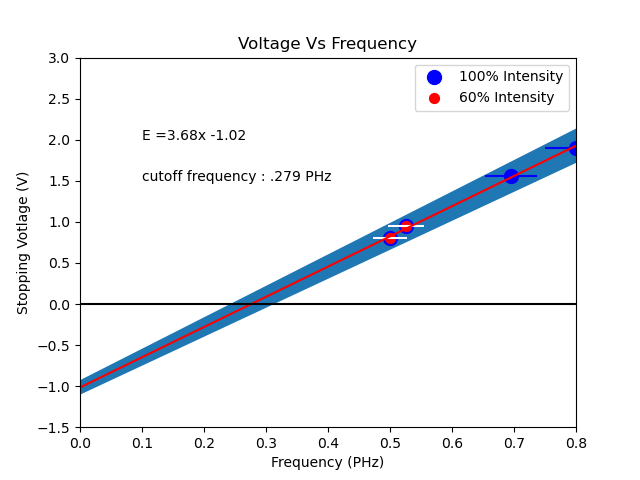

In [80]:
# Set up the figure for plotting 

fig, ax = plt.subplots()

#scatter plot of points 
plt.scatter(freq_data, vol_data, s = 100, color = "blue", zorder = 2)

plt.scatter(freq_data_60, vol_60, s = 50, color = 'red', zorder = 2)

# creating two error bars one for regular colors and one for 60% intensity 
plt.errorbar(freq_data, vol_data, xerr = freq_unc,yerr = unc_voltage,color = "blue",  ls = 'none')

plt.errorbar(freq_data_60, vol_60, xerr = freq_unc_60, yerr = unc_voltage[2:], color = "white", ls = 'none')


# creates the red trendline with base coefficients and the standard errors

ax.axline((0, B_1), slope = B_0, color = "red" )

x = np.arange(0, 3, 1)
          
ax.fill_between(x, ((B_0 - B_0_err)*x + (B_1 - B_1_err)) , ((B_0 + B_0_err)*x + (B_1 + B_1_err)))

#X axis
ax.axline((0, 0), slope = 0, color = "black")

#creates the text showing slope and intercept as well as cutoff frequency 

ax.text(.1, 2, 'E =' + f"{B_0:.2f}" + "x "  + f"{B_1:.2f}")

ax.text(.1, 1.5, 'cutoff frequency : .279 PHz')

#Add labels to voltage frequency 
plt.xlabel("Frequency (PHz)")

plt.ylabel("Stopping Votlage (V)")

plt.xlim(0, .8)
plt.ylim(-1.5, 3)

plt.title("Voltage Vs Frequency")

plt.legend(["100% Intensity", "60% Intensity"])

plt.savefig("Lab1PhotoElectricEffect")

As can be seen, there is a linear relationship between the Frequency and the stopping voltage. The intensity of the incident light did not change the stopping voltage. 

These results allign with the predictions from quantum theory. 

# 6. Calculate Planks constant

The charge of an electron is known and the slope of the line is known from the Betas in the model output. 

Calculate the planks constant by multiplying the slope times the charge of the electron. Keep in mind the uncertanties present so use multiply_uncertainties

In [81]:
e = 1.602 * 10 **-19

h, h_del = multiply_uncertainties(e, 0, B_0, B_0_err )

F"{h} +/- {h_del}"

'5.893026229570359e-19 +/- 2.4162426021492318e-20'

In [82]:
F"planks constant is: h = e * (h/e) = ({5.9} +-  {.2}) * 10 ^-19 J-Hz "

'planks constant is: h = e * (h/e) = (5.9 +-  0.2) * 10 ^-19 J-Hz '

In [83]:
F"Close to accepted value of {6.62} * { 10**-34} J-Hz but improper error propagation prevented acquisition of appropriate h "

'Close to accepted value of 6.62 * 1e-34 J-Hz but improper error propagation prevented acquisition of appropriate h '

# 7 . Calculate work function (Optional)

Work function can be calculated in a similar manner by multiplying the intercept by the charge of an electron. 

In [87]:
W0, W0_del = multiply_uncertainties(e, 0, B_1, B_1_err )

F"{W0} +/- {W0_del}"

'-1.627950925522459e-19 +/- 1.414496966362366e-20'

In [92]:
F"The Work function is: W0 = ({-1.62} +/- {.14}) * 10 ^-20 J"

'The Work function is: W0 = (-1.62 +/- 0.14) * 10 ^-20 J'

It looks like 1.62 +/- .14 J are needed to begin kicking off electrons 

# Sources

- https://www.geeksforgeeks.org/orthogonal-distance-regression-using-scipy/#:~:text=Import%20ODR%20function%20from%20scipy.%20Create%20a%20sample,be%20used%20for%20fitting%2C%20by%20the%20odr%20function.

- https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html

- https://stackoverflow.com/questions/17431441/matplotlib-scatter-plot-to-foreground-on-top-of-a-contour-plot





# Acknowledgements

I would like to acknowledge the assistance of Professor Beardsley who helped me find issues in the notebook as well as advice for appropriate plotting. 

I would also like to thank jude riley for assisting me with this notebook 